### Classifying Breast cancer diagnosis using Logistic Regression

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
df = pd.read_csv('./breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### In the 'diagnosis' column, M represents malignant (cancerous) while B represents benign(non cancerous).

### Encoding categorical data using the LabelEncoder

In [34]:
from sklearn.preprocessing import LabelEncoder
diagnosis_le = LabelEncoder()
df['diagnosis'] = diagnosis_le.fit_transform(df['diagnosis'])

In [35]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### X are the independent variables while y is the dependent variable

In [36]:
X = df.drop(columns=['id','diagnosis'])
y = df['diagnosis']

### Splitting the data into training and testing sets

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

### The Logistic Regression model

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

In [39]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

#### The model's score

In [40]:
model.score(X_test,y_test)

0.9473684210526315

In [41]:
y_predicted = model.predict(X_test)

#### using a confusion matrix to visualize the model's performance

In [42]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_predicted,y_test)

Text(42.0, 0.5, 'Predicted-values')

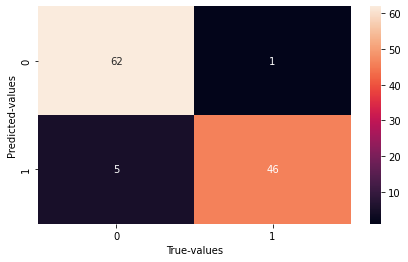

In [43]:
plt.figure(figsize=(7,4))
sns.heatmap(cm, annot=True)
plt.xlabel('True-values')
plt.ylabel('Predicted-values')

### Comparing actual values to predicted values

In [44]:
df.loc[500:505,'diagnosis']

500    0
501    1
502    0
503    1
504    0
505    0
Name: diagnosis, dtype: int64

In [45]:
model.predict(X.iloc[500:506,:])

array([0, 1, 0, 1, 0, 0])